In [1]:
%load_ext autoreload

In [5]:
%autoreload 2
%aimport AD_predictor_tools
%aimport AD_comparison_tools
%aimport PlottingTools
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# IF you just split out acidic ADs from GSL and make a hist of those tiles, would it be an acidic bunch and a non acidic bunch?

In [9]:
tiled_GSL = AD_predictor_tools.makeTilingDF("../data/GoldStandardADList.fasta")
tiled_GSL

Using existing Tiling DF at ../data/TilingDFs/GoldStandardADList_size_39_space_1_AAs_W,F,Y,M,L,Q.csv


,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,Charge
0,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLN,>sp|P32243|OTX2|Cterm|231|289,0,39,1,1,2,0,5,3,-1
1,NQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNF,>sp|P32243|OTX2|Cterm|231|289,1,40,1,2,2,0,4,3,-1
2,QSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFN,>sp|P32243|OTX2|Cterm|231|289,2,41,1,2,2,0,4,3,-1
3,SPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNA,>sp|P32243|OTX2|Cterm|231|289,3,42,1,2,2,0,4,2,-1
4,PASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNAD,>sp|P32243|OTX2|Cterm|231|289,4,43,1,2,2,0,4,2,-2
...,...,...,...,...,...,...,...,...,...,...,...
11015,TLPYVPEPIKVAIAENLLDVIKDTRSKEITSDTMEQSIH,>sp|Q8WYP5|AHCTF1|nan|1446|1698,210,249,0,0,1,1,3,1,-3
11016,LPYVPEPIKVAIAENLLDVIKDTRSKEITSDTMEQSIHE,>sp|Q8WYP5|AHCTF1|nan|1446|1698,211,250,0,0,1,1,3,1,-4
11017,PYVPEPIKVAIAENLLDVIKDTRSKEITSDTMEQSIHET,>sp|Q8WYP5|AHCTF1|nan|1446|1698,212,251,0,0,1,1,2,1,-4
11018,YVPEPIKVAIAENLLDVIKDTRSKEITSDTMEQSIHETI,>sp|Q8WYP5|AHCTF1|nan|1446|1698,213,252,0,0,1,1,2,1,-4


Text(0, 0.5, 'Count of Tiles from GSL ADs')

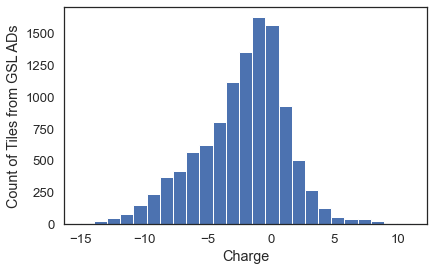

In [45]:
plt.hist(tiled_GSL["Charge"], bins = 25)
plt.xlabel("Charge")
plt.ylabel("Count of Tiles from GSL ADs")

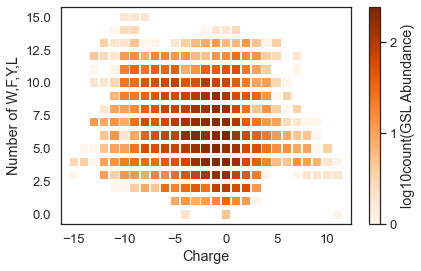

In [36]:
PlottingTools.plot_one_heatmap(tiled_GSL, cmap = "Oranges", label = "GSL Abundance", s = 70)

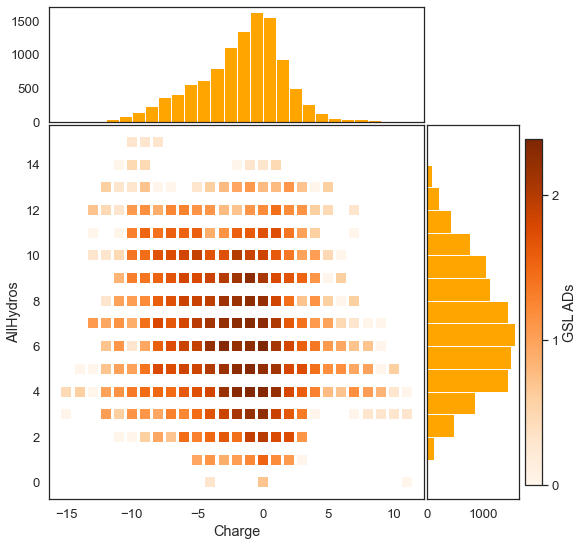

In [51]:
PlottingTools.plot_marg_hists(tiled_GSL, "GSL ADs", color = "Orange", cmap = "Oranges")


---

In [20]:
GSL = pd.read_csv("../data/Gold Standard AD List With Counts.csv")
GSL

,Unnamed: 0,GeneName,AD name,Start,End,uniprotID,Sequence,Reference,Length,A,...,S,T,D,E,R,H,K,G,P,AllHydros
0,0,OTX2,Cterm,231,289,P32243,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,uniprot,59,4,...,9,5,6,0,0,0,4,3,1,15
1,1,CRX,Cterm,200,284,O43186,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,Chen 2002 pg 873,85,5,...,18,4,4,1,0,0,2,9,13,19
2,2,VP16,Full,411,490,P06492,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...,NaN,80,9,...,4,4,16,5,0,3,0,10,6,15
3,3,VP16,H1,411,456,P06492,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG,NaN,46,5,...,3,2,11,2,0,2,0,6,4,7
4,4,VP16,MVS N_C (acid blob library fragment,418,456,P06492,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,NaN,39,4,...,2,1,11,2,0,2,0,4,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,ESRRB,NaN,203,433,O95718,PPAKKPLTKIVSYLLVAEPDKLYAMPPPGMPEGDIKALTTLCDLAD...,transcriptionalactivity_regions.txt,231,19,...,12,7,13,19,9,6,19,9,13,60
190,190,NR3C1,NaN,98,115,P04150,MGNDLGFPQQGQISLSSG,transcriptionalactivity_regions.txt,18,0,...,3,0,1,0,0,0,0,4,1,3
191,191,AHR,NaN,118,126,P35869,LLQALNGFV,transcriptionalactivity_regions.txt,9,1,...,0,0,0,0,0,0,0,1,0,4
192,192,AHR,NaN,266,268,P35869,FAI,transcriptionalactivity_regions.txt,3,1,...,0,0,0,0,0,0,0,0,0,1


In [23]:
GSL["Charge"] = GSL["K"] + GSL["R"] - GSL["D"] - GSL["E"]
GSL

,Unnamed: 0,GeneName,AD name,Start,End,uniprotID,Sequence,Reference,Length,A,...,T,D,E,R,H,K,G,P,AllHydros,Charge
0,0,OTX2,Cterm,231,289,P32243,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,uniprot,59,4,...,5,6,0,0,0,4,3,1,15,-2
1,1,CRX,Cterm,200,284,O43186,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,Chen 2002 pg 873,85,5,...,4,4,1,0,0,2,9,13,19,-3
2,2,VP16,Full,411,490,P06492,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...,NaN,80,9,...,4,16,5,0,3,0,10,6,15,-21
3,3,VP16,H1,411,456,P06492,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG,NaN,46,5,...,2,11,2,0,2,0,6,4,7,-13
4,4,VP16,MVS N_C (acid blob library fragment,418,456,P06492,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,NaN,39,4,...,1,11,2,0,2,0,4,2,7,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,ESRRB,NaN,203,433,O95718,PPAKKPLTKIVSYLLVAEPDKLYAMPPPGMPEGDIKALTTLCDLAD...,transcriptionalactivity_regions.txt,231,19,...,7,13,19,9,6,19,9,13,60,-4
190,190,NR3C1,NaN,98,115,P04150,MGNDLGFPQQGQISLSSG,transcriptionalactivity_regions.txt,18,0,...,0,1,0,0,0,0,4,1,3,-1
191,191,AHR,NaN,118,126,P35869,LLQALNGFV,transcriptionalactivity_regions.txt,9,1,...,0,0,0,0,0,0,1,0,4,0
192,192,AHR,NaN,266,268,P35869,FAI,transcriptionalactivity_regions.txt,3,1,...,0,0,0,0,0,0,0,0,1,0


In [24]:
acidic_GSL = GSL[GSL["Charge"] < 0]
acidic_GSL

,Unnamed: 0,GeneName,AD name,Start,End,uniprotID,Sequence,Reference,Length,A,...,T,D,E,R,H,K,G,P,AllHydros,Charge
0,0,OTX2,Cterm,231,289,P32243,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,uniprot,59,4,...,5,6,0,0,0,4,3,1,15,-2
1,1,CRX,Cterm,200,284,O43186,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,Chen 2002 pg 873,85,5,...,4,4,1,0,0,2,9,13,19,-3
2,2,VP16,Full,411,490,P06492,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...,NaN,80,9,...,4,16,5,0,3,0,10,6,15,-21
3,3,VP16,H1,411,456,P06492,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG,NaN,46,5,...,2,11,2,0,2,0,6,4,7,-13
4,4,VP16,MVS N_C (acid blob library fragment,418,456,P06492,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,NaN,39,4,...,1,11,2,0,2,0,4,2,7,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,AKAP8L,NaN,1,268,Q9ULX6,MSYTGFVQGSETTLQSTYSDTSAQPTCDYGYGTWNSGTNRGYEGYG...,activation_regions.txt,268,16,...,19,17,13,21,2,2,41,10,46,-7
188,188,FOXA2,NaN,14,93,Q9Y261,DWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSMSAAAMGSGSGNMS...,activation_regions.txt,80,11,...,1,1,2,0,0,0,16,3,8,-3
189,189,ESRRB,NaN,203,433,O95718,PPAKKPLTKIVSYLLVAEPDKLYAMPPPGMPEGDIKALTTLCDLAD...,transcriptionalactivity_regions.txt,231,19,...,7,13,19,9,6,19,9,13,60,-4
190,190,NR3C1,NaN,98,115,P04150,MGNDLGFPQQGQISLSSG,transcriptionalactivity_regions.txt,18,0,...,0,1,0,0,0,0,4,1,3,-1


In [26]:
tiled_acidic_GSL = AD_predictor_tools.makeTilingDF_fromDF(acidic_GSL)
tiled_acidic_GSL

Creating new Tiling DF at  ../data/TilingDFs/temp337195745291545637547069098570696129824_size_39_space_1_AAs_W,F,Y,M,L,Q.csv
Window Size = 39  and Window spacing = 1
Number of Tiling Windows: 9542


,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLN,>sp|P32243|OTX2|231|289,0,39,1,1,2,0,5,3,2,0,3,0,-1
1,NQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNF,>sp|P32243|OTX2|231|289,1,40,1,2,2,0,4,3,2,0,3,0,-1
2,QSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFN,>sp|P32243|OTX2|231|289,2,41,1,2,2,0,4,3,2,0,3,0,-1
3,SPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNA,>sp|P32243|OTX2|231|289,3,42,1,2,2,0,4,2,2,0,3,0,-1
4,PASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNAD,>sp|P32243|OTX2|231|289,4,43,1,2,2,0,4,2,2,0,4,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,TLPYVPEPIKVAIAENLLDVIKDTRSKEITSDTMEQSIH,>sp|Q8WYP5|AHCTF1|1446|1698,210,249,0,0,1,1,3,1,3,1,3,4,-3
9538,LPYVPEPIKVAIAENLLDVIKDTRSKEITSDTMEQSIHE,>sp|Q8WYP5|AHCTF1|1446|1698,211,250,0,0,1,1,3,1,3,1,3,5,-4
9539,PYVPEPIKVAIAENLLDVIKDTRSKEITSDTMEQSIHET,>sp|Q8WYP5|AHCTF1|1446|1698,212,251,0,0,1,1,2,1,3,1,3,5,-4
9540,YVPEPIKVAIAENLLDVIKDTRSKEITSDTMEQSIHETI,>sp|Q8WYP5|AHCTF1|1446|1698,213,252,0,0,1,1,2,1,3,1,3,5,-4


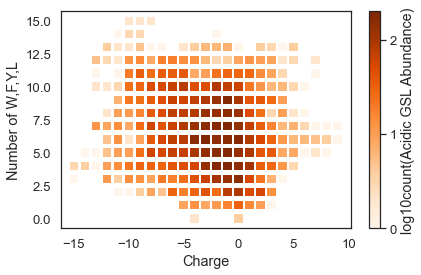

In [35]:
PlottingTools.plot_one_heatmap(tiled_acidic_GSL, cmap = "Oranges", label = "Acidic GSL Abundance", s = 70)

Text(0, 0.5, 'Count of Tiles from Acidic GSL ADs')

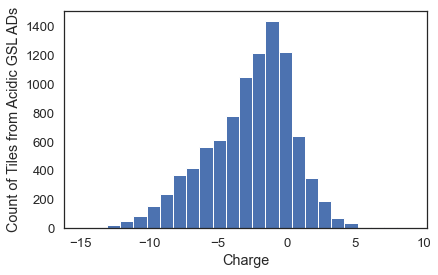

In [44]:
plt.hist(tiled_acidic_GSL["Charge"], bins = 25)
plt.xlabel("Charge")
plt.ylabel("Count of Tiles from Acidic GSL ADs")

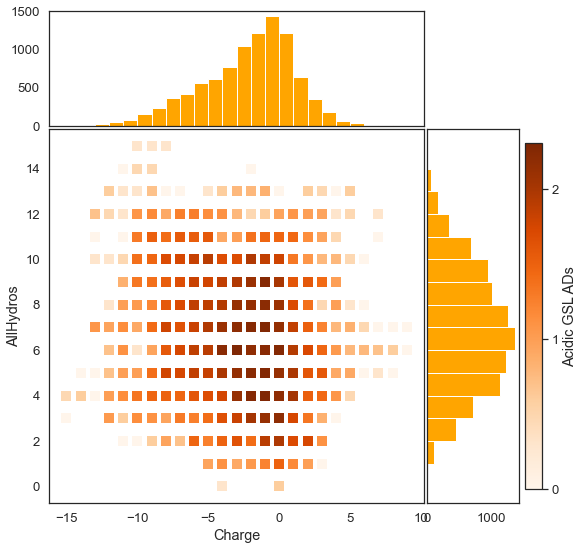

In [50]:
PlottingTools.plot_marg_hists(tiled_acidic_GSL, "Acidic GSL ADs", color = "Orange", cmap = "Oranges")


---
# Most common tile charge of TFs

In [52]:
tiled_Lambert = pd.read_csv("../data/tiled_lambert.csv")
tiled_Lambert

,Unnamed: 0,ProteinWindowSeq,GeneName,StartPosition,EndPosition,A,I,L,M,V,...,S,T,D,E,R,H,K,G,P,Charge
0,0,MEQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEA,sp|P23511|NFYA_HUMAN,0,39,4,2,1,1,4,...,3,4,0,3,0,0,0,3,0,-3
1,1,EQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQ,sp|P23511|NFYA_HUMAN,1,40,4,2,1,0,4,...,3,4,0,3,0,0,0,3,0,-3
2,2,QYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQV,sp|P23511|NFYA_HUMAN,2,41,4,2,1,0,5,...,3,4,0,2,0,0,0,3,0,-2
3,3,YTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVA,sp|P23511|NFYA_HUMAN,3,42,5,2,1,0,5,...,3,4,0,2,0,0,0,3,0,-2
4,4,TANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVAS,sp|P23511|NFYA_HUMAN,4,43,5,2,1,0,5,...,4,4,0,2,0,0,0,3,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881339,881339,FGKLLLLLPSLRFITAERIELLFFRKTIGNTPMEKLLCD,sp|Q9Y5X4|NR2E3_HUMAN,367,406,1,3,10,1,0,...,1,3,1,3,3,0,3,2,2,2
881340,881340,GKLLLLLPSLRFITAERIELLFFRKTIGNTPMEKLLCDM,sp|Q9Y5X4|NR2E3_HUMAN,368,407,1,3,10,2,0,...,1,3,1,3,3,0,3,2,2,2
881341,881341,KLLLLLPSLRFITAERIELLFFRKTIGNTPMEKLLCDMF,sp|Q9Y5X4|NR2E3_HUMAN,369,408,1,3,10,2,0,...,1,3,1,3,3,0,3,1,2,2
881342,881342,LLLLLPSLRFITAERIELLFFRKTIGNTPMEKLLCDMFK,sp|Q9Y5X4|NR2E3_HUMAN,370,409,1,3,10,2,0,...,1,3,1,3,3,0,3,1,2,2


In [55]:
min(tiled_Lambert["Charge"])

-39

In [56]:
max(tiled_Lambert["Charge"])

21

In [68]:
charge_counts_lambert = tiled_Lambert.groupby("Charge").agg('count').reset_index()
charge_counts_lambert

,Charge,Unnamed: 0,ProteinWindowSeq,GeneName,StartPosition,EndPosition,A,I,L,M,...,Q,S,T,D,E,R,H,K,G,P
0,-39,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
1,-38,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,-37,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,-36,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,-35,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,17,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
57,18,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
58,19,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
59,20,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


In [70]:
charge_counts_lambert[charge_counts_lambert["ProteinWindowSeq"] == max(charge_counts_lambert["ProteinWindowSeq"])]

,Charge,Unnamed: 0,ProteinWindowSeq,GeneName,StartPosition,EndPosition,A,I,L,M,...,Q,S,T,D,E,R,H,K,G,P
39,0,99370,99370,99370,99370,99370,99370,99370,99370,99370,...,99370,99370,99370,99370,99370,99370,99370,99370,99370,99370


---
# GSL AA Enrichment

In [75]:
GSL_counts = pd.read_csv("../data/Gold Standard AD List With Counts.csv")
GSL_counts

,Unnamed: 0,GeneName,AD name,Start,End,uniprotID,Sequence,Reference,Length,A,...,S,T,D,E,R,H,K,G,P,AllHydros
0,0,OTX2,Cterm,231,289,P32243,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,uniprot,59,4,...,9,5,6,0,0,0,4,3,1,15
1,1,CRX,Cterm,200,284,O43186,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,Chen 2002 pg 873,85,5,...,18,4,4,1,0,0,2,9,13,19
2,2,VP16,Full,411,490,P06492,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...,NaN,80,9,...,4,4,16,5,0,3,0,10,6,15
3,3,VP16,H1,411,456,P06492,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG,NaN,46,5,...,3,2,11,2,0,2,0,6,4,7
4,4,VP16,MVS N_C (acid blob library fragment,418,456,P06492,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,NaN,39,4,...,2,1,11,2,0,2,0,4,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,ESRRB,NaN,203,433,O95718,PPAKKPLTKIVSYLLVAEPDKLYAMPPPGMPEGDIKALTTLCDLAD...,transcriptionalactivity_regions.txt,231,19,...,12,7,13,19,9,6,19,9,13,60
190,190,NR3C1,NaN,98,115,P04150,MGNDLGFPQQGQISLSSG,transcriptionalactivity_regions.txt,18,0,...,3,0,1,0,0,0,0,4,1,3
191,191,AHR,NaN,118,126,P35869,LLQALNGFV,transcriptionalactivity_regions.txt,9,1,...,0,0,0,0,0,0,0,1,0,4
192,192,AHR,NaN,266,268,P35869,FAI,transcriptionalactivity_regions.txt,3,1,...,0,0,0,0,0,0,0,0,0,1


In [76]:
GSL_counts["S_prop"] = GSL_counts["S"] / GSL_counts["Length"]
GSL_counts["A_prop"] = GSL_counts["A"] / GSL_counts["Length"]

In [77]:
GSL_counts[GSL_counts["A_prop"] > 0.15]

,Unnamed: 0,GeneName,AD name,Start,End,uniprotID,Sequence,Reference,Length,A,...,D,E,R,H,K,G,P,AllHydros,S_prop,A_prop
35,35,PDX-1,LC1_N,1,39,P52945,MNGEEQYYAATQLYKDPCAFQRGPAPEFSASPPACLYMG,NaN,39,6,...,1,3,1,0,1,3,5,8,0.051282,0.153846
68,68,PIT1/POU1F1/GHF1,NaN,1,37,P28069,MSCQAFTSADTFIPLNSDASATLPLIMHHSAAECLPV,Choi 2000 list,37,6,...,2,1,0,2,0,0,3,6,0.135135,0.162162
83,83,CEBPB,NaN,24,124,P17676,MEVANFYYEADCLAAAYGGKAAPAAPPAARPGPRPPAGELGSIGDH...,Choi 2000 list,101,24,...,7,6,3,3,1,8,17,15,0.059406,0.237624
93,93,FOXC1,NaN,1,51,Q12948,MQARYSVSSPNSLGVVPYLGGEQSYYRAAAAAAGGGYTAMPAPMSV...,R4TA_regions.txt,51,10,...,0,1,2,1,0,6,5,8,0.137255,0.196078
95,95,NRF1,NaN,301,476,Q16656,VPSQTVVQTFSNPDGTVSLIQVGTGATVATLADASELPTTVTVAQV...,R4TA_regions.txt,176,33,...,4,10,0,1,0,16,5,16,0.068182,0.187500
124,124,PGR,NaN,456,546,P06401,STLECILYKAEGAPPQQGPFAPPPCKAPGASGCLLPRDGLPSTSAS...,activation_regions.txt,91,16,...,1,3,2,0,3,10,15,21,0.054945,0.175824
185,185,DUX4,NaN,327,424,Q9UBX2,AGAAPPPQPAPPDASASARQGQMQGIPAPSQALQEPAPWSALPCGL...,activation_regions.txt,98,19,...,2,15,2,0,0,5,15,19,0.081633,0.193878
186,186,DUX4,NaN,405,424,Q9UBX2,AASLEAPLSEEEYRALLEEL,activation_regions.txt,20,4,...,0,6,1,0,0,0,1,6,0.100000,0.200000
192,192,AHR,NaN,266,268,P35869,FAI,transcriptionalactivity_regions.txt,3,1,...,0,0,0,0,0,0,0,1,0.000000,0.333333


In [78]:
9 / 194

0.04639175257731959

In [79]:
GSL_counts[GSL_counts["S_prop"] > 0.15]

,Unnamed: 0,GeneName,AD name,Start,End,uniprotID,Sequence,Reference,Length,A,...,D,E,R,H,K,G,P,AllHydros,S_prop,A_prop
0,0,OTX2,Cterm,231,289,P32243,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,uniprot,59,4,...,6,0,0,0,4,3,1,15,0.152542,0.067797
1,1,CRX,Cterm,200,284,O43186,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,Chen 2002 pg 873,85,5,...,4,1,0,0,2,9,13,19,0.211765,0.058824
12,12,STAT4,TAD,702,748,Q14765,STIRSDSTEPHSPSDLLPMSPSVYAVLRENLSPTTIETAMKSPYSAE,"Wojciak, J., Martinez-Yamout, M., Dyson, H., W...",47,3,...,2,4,2,1,1,0,6,6,0.212766,0.063830
18,18,p65,Cterm,521,551,P04637,PGLPNGLLSGDEDFSSIADMDFSALLSQISS,NaN,31,2,...,4,1,0,0,0,3,2,7,0.225806,0.064516
19,19,p65,Cterm-NMR,521,551,P04637,GSPGYPNGLLSGDEDFSSIADMDFSALLSQISS,NaN,31,2,...,4,1,0,0,0,4,2,7,0.258065,0.064516
30,30,KMT2A/MLL1/CXXC7,Zinc,2885,2915,Q03164,SDDGNILPSDIMDFVLKNTPSMQALGESPES,Choi 2000 list,31,1,...,4,2,0,0,1,2,3,4,0.161290,0.032258
31,31,VDR,vitDreceptor,195,238,P11473,DMMDSSSFSNLDLSEEDSDDPSVTLELSQLSMLPHLADLVSYSI,Choi 2000 list OR uniprot. check,44,1,...,7,3,0,1,0,0,2,10,0.250000,0.022727
49,49,PLAG1,NaN,385,466,Q6DJT9,DPQIGSLDDGAGDLSLSKSSISISDPLNTPALDFSQLFNFIPLNGP...,Choi 2000 list,82,3,...,8,2,0,1,1,6,9,16,0.182927,0.036585
50,50,RUNX1/AML1,NaN,318,358,Q01196,SSRLSTAPDLTAFSDPRQFPALPSISDPRMHYPGAFTYSPT,Choi 2000 list,41,4,...,3,0,3,1,0,1,7,8,0.170732,0.097561
51,51,PAX2,NaN,279,373,Q02962,ASEHIKSEQGNEYSLPALTPGLDEVKSSLSASTNPELGSNVSGTQT...,Choi 2000 list,95,5,...,2,6,1,2,2,11,12,13,0.157895,0.052632


In [80]:
39/194

0.20103092783505155